# Distinguish Your Own Digits (DYOD)

You are going to write a classifier that distinguishes between the number 3 and number 8.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

From the command line run `pip install mnist`. This is a library that will help you bring down the mnist dataset. If you run this from a notebook, you need to put  `!pip install mnist` in a cell by itself.

In [3]:
!pip install mnist

## Preparing the Data

In [4]:
import mnist

In [5]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

In [6]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [7]:
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

2


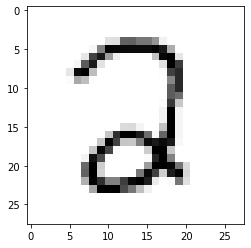

In [9]:
image_index = 7776 # You may select anything up to 60,000
print(train_labels[image_index]) 
plt.imshow(train_images[image_index], cmap='Greys')

## Filter data to get 3 and 8 out

In [10]:
train_filter = np.where((train_labels == 3 ) | (train_labels == 8))
test_filter = np.where((test_labels == 3) | (test_labels == 8))
X_train, y_train = train_images[train_filter], train_labels[train_filter]
X_test, y_test = test_images[test_filter], test_labels[test_filter]

We normalize the pizel values in the 0 to 1 range

In [11]:
X_train = X_train/255.
X_test = X_test/255.

And setup the labels as 1 (when the digit is 3) and 0 (when the digit is 8)

In [12]:
y_train = 1*(y_train==3)
y_test = 1*(y_test==3)

In [13]:
X_train.shape, X_test.shape

((11982, 28, 28), (1984, 28, 28))

We reshape the data to flatten the image pixels into a set of features or co-variates:

In [14]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_train.shape, X_test.shape

((11982, 784), (1984, 784))

In [15]:
#Impoting functions from 'Kudzu'
from kudzu.model import Model
from kudzu.train import Learner
from kudzu.optim import GD
from kudzu.data import Data, Sampler,Dataloader

from kudzu.callbacks import AccCallback
from kudzu.callbacks import ClfCallback

from kudzu.loss import MSE

from kudzu.layer import Sigmoid,Relu
from kudzu.layer import Affine

### Let us create a `Config` class, to store important parameters. 
This class essentially plays the role of a dictionary.

In [16]:
class Config:
    pass
config = Config()
config.lr = 0.001
config.num_epochs = 250
config.bs = 50

### Running Models with the Training data
Details about the network layers:
- A first affine layer has 784 inputs and does 100 affine transforms. These are followed by a Relu
- A second affine layer has 100 inputs from the 100 activations of the past layer, and does 100 affine transforms. These are followed by a Relu
- A third affine layer has 100 activations and does 2 affine transformations to create an embedding for visualization. There is no non-linearity here.
- A final "logistic regression" which has an affine transform from 2 inputs to 1 output, which is squeezed through a sigmoid.


In [17]:
data = Data(X_train, y_train.reshape(-1,1))
sampler = Sampler(data, config.bs, shuffle=True)

dl = Dataloader(data, sampler)

opt = GD(config.lr)
loss = MSE()

In [18]:
training_data_x = X_train
testing_data_x = X_test
training_data_y = y_train.reshape(-1,1)
testing_data_y = y_test.reshape(-1,1)

In [19]:
layers = [Affine("first", 784, 100), Relu("first"), Affine("second", 100, 100), Relu("second"), Affine("third", 100, 2), Affine("last", 2, 1), Sigmoid("last")]
model_nn = Model(layers)
model_lr = Model([Affine("logits", 784, 1), Sigmoid("sigmoid")])

xavier
xavier
xavier
xavier
xavier


In [20]:
nn_learner = Learner(loss, model_nn, opt, config.num_epochs)
acc_nn = ClfCallback(nn_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
nn_learner.set_callbacks([acc_nn])

In [21]:
lr_learner = Learner(loss, model_lr, opt, config.num_epochs)
acc_lr = ClfCallback(lr_learner, config.bs, training_data_x , testing_data_x, training_data_y, testing_data_y)
lr_learner.set_callbacks([acc_lr])

In [22]:
nn_learner.train_loop(dl)

Epoch 0, Loss 0.2481
Training Accuracy: 0.5251, Testing Accuracy: 0.5222



Epoch 10, Loss 0.1867
Training Accuracy: 0.8771, Testing Accuracy: 0.8931



Epoch 20, Loss 0.0948
Training Accuracy: 0.9151, Testing Accuracy: 0.9234



Epoch 30, Loss 0.0615
Training Accuracy: 0.9368, Testing Accuracy: 0.9456



Epoch 40, Loss 0.0486
Training Accuracy: 0.9464, Testing Accuracy: 0.9546



Epoch 50, Loss 0.0419
Training Accuracy: 0.9523, Testing Accuracy: 0.9592



Epoch 60, Loss 0.0379
Training Accuracy: 0.9571, Testing Accuracy: 0.9652



Epoch 70, Loss 0.0351
Training Accuracy: 0.9598, Testing Accuracy: 0.9667



Epoch 80, Loss 0.033
Training Accuracy: 0.9622, Testing Accuracy: 0.9682



Epoch 90, Loss 0.0314
Training Accuracy: 0.9641, Testing Accuracy: 0.9693



Epoch 100, Loss 0.03
Training Accuracy: 0.9654, Testing Accuracy: 0.9713



Epoch 110, Loss 0.0289
Training Accuracy: 0.9661, Testing Accuracy: 0.9713



Epoch 120, Loss 0.0279
Training Accuracy: 0.9673, Testing Accuracy: 0.9713



Epoch 130, Loss 0.027
Training Accuracy: 0.9689, Testing Accuracy: 0.9718



Epoch 140, Loss 0.0262
Training Accuracy: 0.9695, Testing Accuracy: 0.9718



Epoch 150, Loss 0.0256
Training Accuracy: 0.9704, Testing Accuracy: 0.9708



Epoch 160, Loss 0.0249
Training Accuracy: 0.9706, Testing Accuracy: 0.9718



Epoch 170, Loss 0.0243
Training Accuracy: 0.9711, Testing Accuracy: 0.9713



Epoch 180, Loss 0.0238
Training Accuracy: 0.9714, Testing Accuracy: 0.9713



Epoch 190, Loss 0.0233
Training Accuracy: 0.9725, Testing Accuracy: 0.9713



Epoch 200, Loss 0.0228
Training Accuracy: 0.9730, Testing Accuracy: 0.9708



Epoch 210, Loss 0.0224
Training Accuracy: 0.9738, Testing Accuracy: 0.9713



Epoch 220, Loss 0.0219
Training Accuracy: 0.9746, Testing Accuracy: 0.9713



Epoch 230, Loss 0.0215
Training Accuracy: 0.9753, Testing Accuracy: 0.9718



Epoch 240, Loss 0.0211
Training Accuracy: 0.9755, Testing Accuracy: 0.9713



0.006273845956756346

In [23]:
lr_learner.train_loop(dl)

Epoch 0, Loss 0.2498
Training Accuracy: 0.6415, Testing Accuracy: 0.6310



Epoch 10, Loss 0.1037
Training Accuracy: 0.9106, Testing Accuracy: 0.9269



Epoch 20, Loss 0.0789
Training Accuracy: 0.9296, Testing Accuracy: 0.9466



Epoch 30, Loss 0.0679
Training Accuracy: 0.9377, Testing Accuracy: 0.9511



Epoch 40, Loss 0.0613
Training Accuracy: 0.9422, Testing Accuracy: 0.9526



Epoch 50, Loss 0.0569
Training Accuracy: 0.9454, Testing Accuracy: 0.9541



Epoch 60, Loss 0.0536
Training Accuracy: 0.9475, Testing Accuracy: 0.9561



Epoch 70, Loss 0.0511
Training Accuracy: 0.9499, Testing Accuracy: 0.9567



Epoch 80, Loss 0.0491
Training Accuracy: 0.9510, Testing Accuracy: 0.9577



Epoch 90, Loss 0.0474
Training Accuracy: 0.9527, Testing Accuracy: 0.9597



Epoch 100, Loss 0.046
Training Accuracy: 0.9539, Testing Accuracy: 0.9607



Epoch 110, Loss 0.0448
Training Accuracy: 0.9548, Testing Accuracy: 0.9612



Epoch 120, Loss 0.0438
Training Accuracy: 0.9557, Testing Accuracy: 0.9637



Epoch 130, Loss 0.0429
Training Accuracy: 0.9564, Testing Accuracy: 0.9642



Epoch 140, Loss 0.042
Training Accuracy: 0.9569, Testing Accuracy: 0.9652



Epoch 150, Loss 0.0413
Training Accuracy: 0.9574, Testing Accuracy: 0.9652



Epoch 160, Loss 0.0406
Training Accuracy: 0.9582, Testing Accuracy: 0.9657



Epoch 170, Loss 0.04
Training Accuracy: 0.9588, Testing Accuracy: 0.9662



Epoch 180, Loss 0.0395
Training Accuracy: 0.9589, Testing Accuracy: 0.9667



Epoch 190, Loss 0.039
Training Accuracy: 0.9594, Testing Accuracy: 0.9667



Epoch 200, Loss 0.0385
Training Accuracy: 0.9597, Testing Accuracy: 0.9667



Epoch 210, Loss 0.0381
Training Accuracy: 0.9600, Testing Accuracy: 0.9667



Epoch 220, Loss 0.0377
Training Accuracy: 0.9605, Testing Accuracy: 0.9677



Epoch 230, Loss 0.0373
Training Accuracy: 0.9609, Testing Accuracy: 0.9682



Epoch 240, Loss 0.0369
Training Accuracy: 0.9611, Testing Accuracy: 0.9682



0.057278633645934204

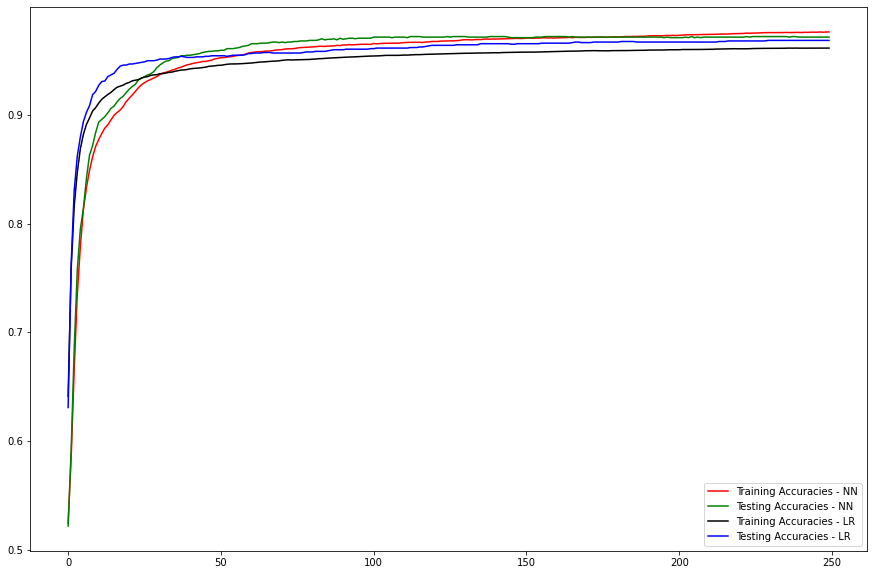

In [24]:
#comparing the results of NN and LR
plt.figure(figsize=(15,10))

# Neural Network plots
plt.plot(acc_nn.accuracies, 'r-', label = "Training Accuracies - NN")
plt.plot(acc_nn.test_accuracies, 'g-', label = "Testing Accuracies - NN")

# Logistic Regression plots
plt.plot(acc_lr.accuracies, 'k-', label = "Training Accuracies - LR")
plt.plot(acc_lr.test_accuracies, 'b-', label = "Testing Accuracies - LR")
plt.legend()

#### Plotting the outputs of this layer of the NN.


In [25]:
new_model = Model(layers[:-2])
testing_plot = new_model(testing_data_x)

Text(0.5, 1.0, 'Outputs')

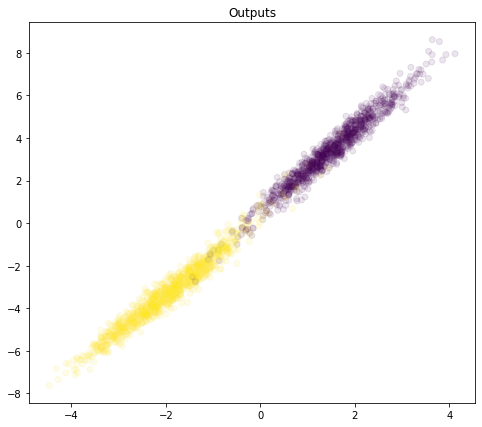

In [26]:
# Plotting the scatter plot of points and color coding by class
plt.figure(figsize=(8,7))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel());
plt.title('Outputs')

Probability contours

In [27]:
model_prob = Model(layers[-2:]) 

In [28]:
#creating the x and y ranges according to the above generated plot.
x_range = np.linspace(-4, 1, 100) 
y_range = np.linspace(-6, 6, 100) 
x_grid, y_grid = np.meshgrid(x_range, y_range) # x_grid and y_grig are of size 100 X 100

# converting x_grid and y_grid to continuous arrays
x_gridflat = np.ravel(x_grid)
y_gridflat = np.ravel(y_grid)

# The last layer of the current model takes two columns as input. Hence transpose of np.vstack() is required.
X = np.vstack((x_gridflat, y_gridflat)).T

prob_contour = model_prob(X).reshape(100,100) 

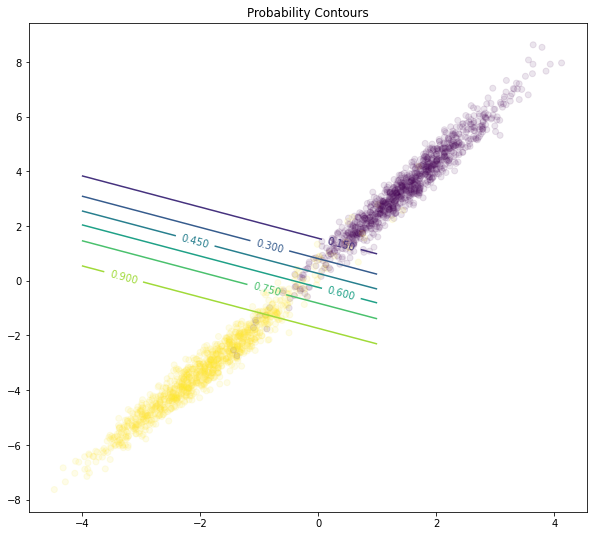

In [29]:
plt.figure(figsize=(10,9))
plt.scatter(testing_plot[:,0], testing_plot[:,1], alpha = 0.1, c = y_test.ravel())
contours = plt.contour(x_grid,y_grid,prob_contour)
plt.title('Probability Contours')
plt.clabel(contours, inline = True );